# **_Chess Piece Classification_**

### __*This CNN is supposed to determine what kind of Chess Piece is in the Image*__

<br>

### __*Import Libraries and choose the device*__

In [1]:
# Import of the Libraries
import os
import CNN

# Torch libraries
import torch
from torch.utils.data import DataLoader

# Device config
GPU = CNN.pick_device()

Using the Graphics Card


<br>

### __*Training Preparation (Set all variables here)*__

In [2]:
# Hyper-parameters
num_epochs = 15             # How many times to repeat learning
batch_size = 32             # Number of images to send at once
learning_rate = 0.0001      # How quickly should it learn

# Image Dimensions
IMG_SIZE = 85               # 85*85 pixels
COLOUR_SIZE = 1

# Define the directory
FILE_PATH = './data/chess/pieces'           # Sub-Folders Location
TRAIN_CSV = './data/chess/train_data.csv'   # Train CSV Location
TEST_CSV = './data/chess/test_data.csv'     # Test CSV Location
CATEGORIES = os.listdir(FILE_PATH)          # Turn Sub-Folder names into a list
N_CLASSES = len(CATEGORIES)                 # Number of different classes

# Create the Model
model = CNN.model.ConvNet(IMG_SIZE, IMG_SIZE, N_CLASSES,COLOUR_SIZE).to(GPU)

# Choose type of Loss & Optimization function
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

<br>

### __*Dataset Creation*__

In [3]:
# Normalized Transformation
MEAN, STD = CNN.dataset.get_normal(FILE_PATH, IMG_SIZE, IMG_SIZE)
trans_normal = CNN.dataset.trans_normal(IMG_SIZE, IMG_SIZE, MEAN, STD)

# Create the .csv file & dictionary
indexing = CNN.dataset.create_csv(FILE_PATH, train_csv=TRAIN_CSV, test_csv=TEST_CSV,
                      rewrite=True, split=True, test_ratio=0.2, mul=16)

# Create the Datasets
train_dataset = CNN.dataset.CustomDataset(FILE_PATH, TRAIN_CSV, transform=trans_normal)
test_dataset = CNN.dataset.CustomDataset(FILE_PATH, TEST_CSV, transform=trans_normal)

# Create the DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

#### __*Look at some data*__

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


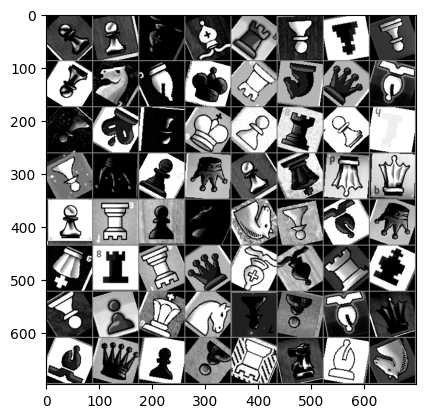

Batch size: 64 | Colour size: 1 | Image Size: 85*85 pixels


,Class,Train Data,Test Data,Total
0,king,448,96,544
1,pawn,3072,752,3824
2,rook,928,224,1152
3,queen,448,96,544
4,bishop,864,208,1072
5,knight,912,224,1136
,,,,
T:,6,6672,1600,8272


In [4]:
# Get dataset overview
CNN.visual.overview(train_dataset, test_dataset, indexing)

<br>

### __*Training Loop*__

--- Training Started ---
Epoch 1 / 15 | Step 209 / 209 | Loss: 1.2919
Epoch 2 / 15 | Step 209 / 209 | Loss: 0.7711
Epoch 3 / 15 | Step 209 / 209 | Loss: 0.6173
Epoch 4 / 15 | Step 209 / 209 | Loss: 0.5261
Epoch 5 / 15 | Step 209 / 209 | Loss: 0.4498
Epoch 6 / 15 | Step 209 / 209 | Loss: 0.4004
Epoch 7 / 15 | Step 209 / 209 | Loss: 0.3658
Epoch 8 / 15 | Step 209 / 209 | Loss: 0.3273
Epoch 9 / 15 | Step 209 / 209 | Loss: 0.2926
Epoch 10 / 15 | Step 209 / 209 | Loss: 0.2606
Epoch 11 / 15 | Step 209 / 209 | Loss: 0.2331
Epoch 12 / 15 | Step 209 / 209 | Loss: 0.2161
Epoch 13 / 15 | Step 209 / 209 | Loss: 0.1896
Epoch 14 / 15 | Step 209 / 209 | Loss: 0.1702

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Epoch 15 / 15 | Step 209 / 209 | Loss: 0.1526
--- Training Finished ---

Class: king | Predicted: knight


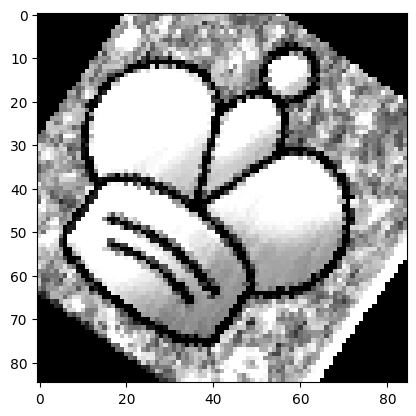

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: king | Predicted: knight


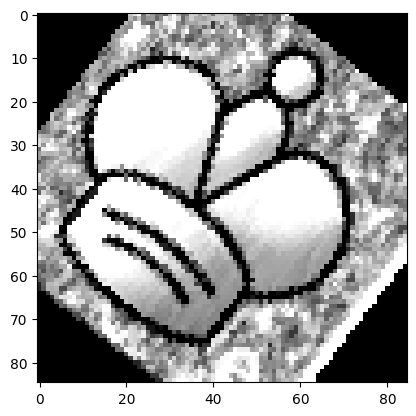

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: king | Predicted: knight


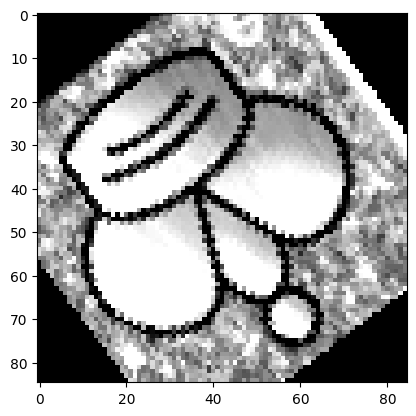

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: king | Predicted: knight


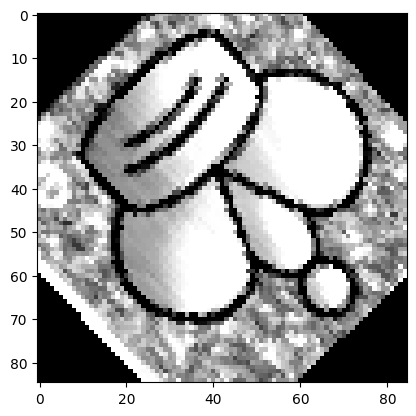

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: king | Predicted: queen


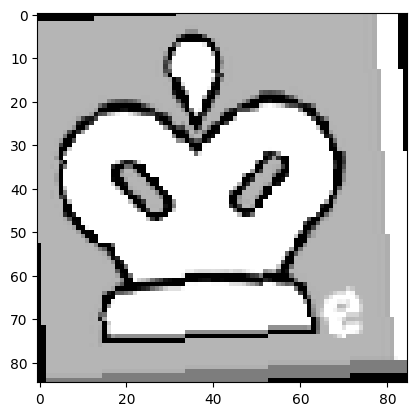

Accuracy of the Model: 91.81 %
Accuracy of king: 59.38 %
Accuracy of pawn: 100.00 %
Accuracy of rook: 91.52 %
Accuracy of queen: 71.88 %
Accuracy of bishop: 92.31 %
Accuracy of knight: 86.61 %


In [5]:
# Train the Model
CNN.model.train_model(model, train_loader, criterion, optimizer, num_epochs, device=GPU)

# Save the Model
SAVE_PATH = './data/chess/chessAdamW.pth'
CNN.model.save_model(model, SAVE_PATH)

# Test the Model
res = CNN.model.load_model(model, test_loader, CATEGORIES, show_wrongs=True)

<br>

### __*Fine-Tuning*__

In [ ]:
# Fine-Tuning Loop
high_res = res
while high_res != 100:
    # Load the most accurate model save
    # model.load_state_dict(torch.load(SAVE_PATH, map_location=GPU))

    # Train the model
    CNN.model.train_model(model, train_loader, criterion, optimizer, n_epochs=1, device=GPU)

    # Test the model
    current_res = CNN.model.load_model(model, test_loader, CATEGORIES, class_results=False)

    # Update the model save with higher precision
    if high_res < current_res:
        high_res = current_res
        CNN.model.save_model(model, SAVE_PATH)

--- Training Started ---
Epoch 1 / 1 | Step 209 / 209 | Loss: 0.1286
--- Training Finished ---
Accuracy of the Model: 90.12 %
--- Training Started ---
Epoch 1 / 1 | Step 209 / 209 | Loss: 0.1255
--- Training Finished ---
Accuracy of the Model: 92.12 %
--- Training Started ---
Epoch 1 / 1 | Step 209 / 209 | Loss: 0.1070
--- Training Finished ---
Accuracy of the Model: 90.75 %
--- Training Started ---
Epoch 1 / 1 | Step 209 / 209 | Loss: 0.0968
--- Training Finished ---
Accuracy of the Model: 91.56 %
--- Training Started ---
Epoch 1 / 1 | Step 209 / 209 | Loss: 0.0897
--- Training Finished ---
Accuracy of the Model: 91.00 %
--- Training Started ---
Epoch 1 / 1 | Step 209 / 209 | Loss: 0.0824
--- Training Finished ---
Accuracy of the Model: 93.12 %
--- Training Started ---
Epoch 1 / 1 | Step 209 / 209 | Loss: 0.0774
--- Training Finished ---
Accuracy of the Model: 93.81 %
--- Training Started ---
Epoch 1 / 1 | Step 209 / 209 | Loss: 0.0624
--- Training Finished ---
Accuracy of the Model: 